# HowTo: Use ForeTiS as a pip package

In this Jupyter notebook, we show how you can use ForeTiS as a pip package and also guide you through the steps that ForeTiS is doing when triggering an optimization run.

Please clone the whole GitHub repository if you want to run this tutorial on your own, as we need the tutorial data from our GitHub repository and to make sure that all paths we define are correct: ``git clone https://github.com/grimmlab/ForeTiS.git``

Then, start a Jupyter notebook server on your machine and open this Jupyter notebook, which is placed at ``docs/source/tutorials`` in the repository.

However, you could also download the single files and define the paths yourself:

- The Jupyter notebook can be downloaded here: [HowTo: Use ForeTiS as a pip package.ipynb](https://github.com/grimmlab/ForeTiS/tree/main/docs/source/tutorials/HowTo%20Use%20ForeTiS%20as%20a%20pip%20package.ipynb)

- The data we use can be found here: [tutorial data](https://github.com/grimmlab/ForeTiS/tree/main/docs/source/tutorials/tutorial_data)


## Installation, imports and paths
First, we may need to install ForeTiS (uncomment if it is not already installed). Then, we import ForeTiS as well as further libraries that we need in this tutorial. In the end, we define some paths and filenames which we will use more often throughout this tutorial. We will save the results in the same directory where this repository is placed.

In [73]:
# !pip3 install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ ForeTiS

In [74]:
import ForeTiS
import pathlib
import pandas as pd
import datetime
import pprint

In [75]:
# Definition of paths and filenames
cwd = pathlib.Path.cwd()
data_dir = cwd.joinpath('tutorial_data')
save_dir = data_dir
model = 'xgboost'

## Run whole optimization pipeline at once
As shown for the [Docker workflow](https://ForeTiS.readthedocs.io/en/latest/tutorials/tut_run_docker.html), ForeTiS offers a function [optim_pipeline.run()](https://github.com/grimmlab/ForeTiS/blob/master/ForeTiS/optim_pipeline.py) that triggers the whole optimization run. 

In the definition of ``optim_pipeline.run()``, we set several default values. In order to run it using our tutorial data, we just need to define the data and directories we want to use as well as the models we want to optimize. Furthermore, we set values for the ``datasplit`` and ``n_trials`` to limit the waiting time for getting the results.

When calling the function, we first see some information regarding the data preprocessing and the configuration of our optimization run, e.g. the data that is used. Then, the current progress of the optuna optimization with results of the individual trials is shown. Afterwards, the optimized model with the best hyperparameters get retrained and tested on a unknown test set. This process of optimizing the hyperparameters and testing the model gets executed for every created feature set. In the end, we show a summary of the whole optimization run.

/home/josef/.local/lib/python3.10/site-packages/ForeTiS/optimization/optuna_optim.py:120: ExperimentalWarning: RetryFailedTrialCallback is experimental (supported from v2.8.0). The interface can change in the future.
  failed_trial_callback=optuna.storages.RetryFailedTrialCallback(max_retry=3))
[I 2023-03-03 21:50:28,146] A new study created in RDB with name: 2023-03-03_21-50-28_-MODELxgboost-TRIALS10-FEATURESETdataset_full


---Dataset is already preprocessed---
### Dataset is loaded ###
### Starting Optuna Optimization for model xgboost and featureset dataset_full ###
## Starting Optimization
Params for Trial 0
{'n_estimators': 700, 'max_depth': 10, 'learning_rate': 0.225, 'gamma': 600, 'subsample': 0.2, 'colsample_bytree': 0.2, 'reg_lambda': 58.0, 'reg_alpha': 867.0}


[I 2023-03-03 21:50:30,959] Trial 0 finished with value: 12477267674.395584 and parameters: {'n_estimators': 700, 'max_depth': 10, 'learning_rate': 0.225, 'gamma': 600, 'subsample': 0.2, 'colsample_bytree': 0.2, 'reg_lambda': 58.0, 'reg_alpha': 867.0}. Best is trial 0 with value: 12477267674.395584.


Params for Trial 1
{'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.025, 'gamma': 970, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.25, 'reg_lambda': 182.0, 'reg_alpha': 183.0}


[I 2023-03-03 21:50:34,236] Trial 1 finished with value: 23865390820.383522 and parameters: {'n_estimators': 800, 'max_depth': 8, 'learning_rate': 0.025, 'gamma': 970, 'subsample': 0.8500000000000001, 'colsample_bytree': 0.25, 'reg_lambda': 182.0, 'reg_alpha': 183.0}. Best is trial 0 with value: 12477267674.395584.


Params for Trial 2
{'n_estimators': 650, 'max_depth': 6, 'learning_rate': 0.15, 'gamma': 290, 'subsample': 0.6500000000000001, 'colsample_bytree': 0.15000000000000002, 'reg_lambda': 292.0, 'reg_alpha': 366.0}


[I 2023-03-03 21:50:36,728] Trial 2 finished with value: 16570702631.08224 and parameters: {'n_estimators': 650, 'max_depth': 6, 'learning_rate': 0.15, 'gamma': 290, 'subsample': 0.6500000000000001, 'colsample_bytree': 0.15000000000000002, 'reg_lambda': 292.0, 'reg_alpha': 366.0}. Best is trial 0 with value: 12477267674.395584.


Params for Trial 3
{'n_estimators': 750, 'max_depth': 9, 'learning_rate': 0.07500000000000001, 'gamma': 510, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.05, 'reg_lambda': 608.0, 'reg_alpha': 170.0}


[I 2023-03-03 21:50:39,557] Trial 3 finished with value: 32826934290.40348 and parameters: {'n_estimators': 750, 'max_depth': 9, 'learning_rate': 0.07500000000000001, 'gamma': 510, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.05, 'reg_lambda': 608.0, 'reg_alpha': 170.0}. Best is trial 0 with value: 12477267674.395584.


Params for Trial 4
{'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.3, 'gamma': 810, 'subsample': 0.35000000000000003, 'colsample_bytree': 0.1, 'reg_lambda': 684.0, 'reg_alpha': 440.0}


[I 2023-03-03 21:50:41,567] Trial 4 finished with value: 27304306183.488396 and parameters: {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.3, 'gamma': 810, 'subsample': 0.35000000000000003, 'colsample_bytree': 0.1, 'reg_lambda': 684.0, 'reg_alpha': 440.0}. Best is trial 0 with value: 12477267674.395584.


Params for Trial 5
{'n_estimators': 550, 'max_depth': 6, 'learning_rate': 0.025, 'gamma': 910, 'subsample': 0.3, 'colsample_bytree': 0.7000000000000001, 'reg_lambda': 312.0, 'reg_alpha': 520.0}


[I 2023-03-03 21:50:43,798] Trial 5 finished with value: 41682236193.01747 and parameters: {'n_estimators': 550, 'max_depth': 6, 'learning_rate': 0.025, 'gamma': 910, 'subsample': 0.3, 'colsample_bytree': 0.7000000000000001, 'reg_lambda': 312.0, 'reg_alpha': 520.0}. Best is trial 0 with value: 12477267674.395584.


Params for Trial 6
{'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 780, 'subsample': 0.9500000000000001, 'colsample_bytree': 0.9000000000000001, 'reg_lambda': 598.0, 'reg_alpha': 922.0}


[I 2023-03-03 21:50:46,862] Trial 6 finished with value: 10334330757.877611 and parameters: {'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 780, 'subsample': 0.9500000000000001, 'colsample_bytree': 0.9000000000000001, 'reg_lambda': 598.0, 'reg_alpha': 922.0}. Best is trial 6 with value: 10334330757.877611.


Params for Trial 7
{'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.025, 'gamma': 320, 'subsample': 0.4, 'colsample_bytree': 0.3, 'reg_lambda': 829.0, 'reg_alpha': 357.0}


[I 2023-03-03 21:50:48,724] Trial 7 finished with value: 57564233462.41369 and parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.025, 'gamma': 320, 'subsample': 0.4, 'colsample_bytree': 0.3, 'reg_lambda': 829.0, 'reg_alpha': 357.0}. Best is trial 6 with value: 10334330757.877611.


Params for Trial 8
{'n_estimators': 650, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 810, 'subsample': 0.1, 'colsample_bytree': 1.0, 'reg_lambda': 773.0, 'reg_alpha': 198.0}


[I 2023-03-03 21:50:51,289] Trial 8 finished with value: 59564589526.27223 and parameters: {'n_estimators': 650, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 810, 'subsample': 0.1, 'colsample_bytree': 1.0, 'reg_lambda': 773.0, 'reg_alpha': 198.0}. Best is trial 6 with value: 10334330757.877611.


Params for Trial 9
{'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.225, 'gamma': 730, 'subsample': 0.8, 'colsample_bytree': 0.1, 'reg_lambda': 358.0, 'reg_alpha': 115.0}


[I 2023-03-03 21:50:53,199] Trial 9 finished with value: 21784303396.630066 and parameters: {'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.225, 'gamma': 730, 'subsample': 0.8, 'colsample_bytree': 0.1, 'reg_lambda': 358.0, 'reg_alpha': 115.0}. Best is trial 6 with value: 10334330757.877611.


## Optuna Study finished ##
Study statistics: 
  Finished trials:  10
  Pruned trials:  0
  Completed trials:  10
  Best Trial:  6
  Value:  10334330757.877611
  Params: 
    colsample_bytree: 0.9000000000000001
    gamma: 780
    learning_rate: 0.3
    max_depth: 3
    n_estimators: 800
    reg_alpha: 922.0
    reg_lambda: 598.0
    subsample: 0.9500000000000001
## Retrain best model and test ##
## Results on test set with refitting period: complete ##
{'test_refitting_period_complete_mse': 7746675083.946438, 'test_refitting_period_complete_rmse': 88015.19802821804, 'test_refitting_period_complete_r2_score': 0.849709510924217, 'test_refitting_period_complete_explained_variance': 0.8500353551866467, 'test_refitting_period_complete_MAPE': 4.376419954227729, 'test_refitting_period_complete_sMAPE': 4.09452881498149}


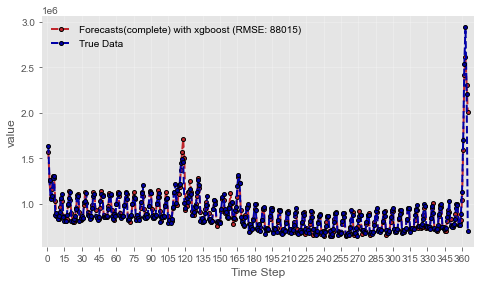

### Finished Optuna Optimization for xgboost and featureset dataset_full ###
# Optimization runs done for models ['xgboost'] and ['dataset_full']
Results overview on the test set(s)
{'xgboost': {'dataset_full': {'Test': {'best_params': {'colsample_bytree': 0.9000000000000001,
                                                       'gamma': 780,
                                                       'learning_rate': 0.3,
                                                       'max_depth': 3,
                                                       'n_estimators': 800,
                                                       'reg_alpha': 922.0,
                                                       'reg_lambda': 598.0,
                                                       'subsample': 0.9500000000000001},
                                       'eval_metrics': {'test_refitting_period_complete_MAPE': 4.376419954227729,
                                                        'test_refitting_peri

<Figure size 432x288 with 0 Axes>

In [76]:
ForeTiS.optim_pipeline.run(data_dir=data_dir, data='nike_sales', config_file_section='nike_sales', save_dir=data_dir, models=[model], n_trials=10, periodical_refit_frequency=['complete'])

Within the defined ``save_dir``, a ``results`` folder will be created. 
   
Then, ForeTiS' default folder structure follows: ``model/featureset/``.

We can see this structure below with all optimization results for the defined ``model``.

In [77]:
result_folders = list(save_dir.joinpath('results', model).glob('*'))
for results_dir in result_folders:
    print(results_dir)

/home/josef/Schreibtisch/01_HorticulturalSalesPrediction/ForeTiS/docs/source/tutorials/tutorial_data/results/xgboost/2023-03-03_21-50-28_dataset_full


In the example below, we can see that each result folder contains different files with detailed results for each of the optimized models.

In [78]:
result_elements = list(result_folders[0].glob('*'))
for result_element in result_elements:
    print(result_element)

/home/josef/Schreibtisch/01_HorticulturalSalesPrediction/ForeTiS/docs/source/tutorials/tutorial_data/results/xgboost/2023-03-03_21-50-28_dataset_full/xgboost_dataset_full_best_refitting_cycle_complete.png
/home/josef/Schreibtisch/01_HorticulturalSalesPrediction/ForeTiS/docs/source/tutorials/tutorial_data/results/xgboost/2023-03-03_21-50-28_dataset_full/xgboost_runtime_overview.csv
/home/josef/Schreibtisch/01_HorticulturalSalesPrediction/ForeTiS/docs/source/tutorials/tutorial_data/results/xgboost/2023-03-03_21-50-28_dataset_full/final_model_test_results.csv
/home/josef/Schreibtisch/01_HorticulturalSalesPrediction/ForeTiS/docs/source/tutorials/tutorial_data/results/xgboost/2023-03-03_21-50-28_dataset_full/final_model_feature_importances.csv
/home/josef/Schreibtisch/01_HorticulturalSalesPrediction/ForeTiS/docs/source/tutorials/tutorial_data/results/xgboost/2023-03-03_21-50-28_dataset_full/unfitted_model_trial6
/home/josef/Schreibtisch/01_HorticulturalSalesPrediction/ForeTiS/docs/source/tu

The ``*_runtime_overview.csv`` file contains the best parameters, evaluation as well as runtime metrics for each of the optimized models as we can see in the example below.

In [79]:
runtime_overview_file = [overview_file for overview_file in result_elements if '_runtime_overview' in str(overview_file)][0]
pd.read_csv(runtime_overview_file)

,Trial,refitting_cycle,process_time_s,real_time_s,params,note
0,0,NaN,15.554622,2.766639,"{'n_estimators': 700, 'max_depth': 10, 'learni...",successful
1,1,NaN,18.451591,3.247319,"{'n_estimators': 800, 'max_depth': 8, 'learnin...",successful
2,2,NaN,13.801943,2.463260,"{'n_estimators': 650, 'max_depth': 6, 'learnin...",successful
3,3,NaN,15.702649,2.794137,"{'n_estimators': 750, 'max_depth': 9, 'learnin...",successful
4,4,NaN,10.769471,1.975961,"{'n_estimators': 500, 'max_depth': 10, 'learni...",successful
5,5,NaN,12.254852,2.201480,"{'n_estimators': 550, 'max_depth': 6, 'learnin...",successful
6,6,NaN,17.035096,3.030404,"{'n_estimators': 800, 'max_depth': 3, 'learnin...",successful
7,7,NaN,10.010519,1.830079,"{'n_estimators': 500, 'max_depth': 3, 'learnin...",successful
8,8,NaN,14.209953,2.536838,"{'n_estimators': 650, 'max_depth': 6, 'learnin...",successful
9,9,NaN,10.266035,1.879361,"{'n_estimators': 500, 'max_depth': 9, 'learnin...",successful


Beyond that, we see below that the detailed results for each optimized model contain validation and test results, saved prediction models, an optuna database, a runtime overview with information for each trial (good for debugging, as pruning reasons are also documented) and for some prediction models also feature importances.

In [80]:
final_model_test_results_file = [overview_file for overview_file in result_elements if 'final_model_test_results' in str(overview_file)][0]
pd.read_csv(final_model_test_results_file)

,y_pred_retrain,y_true_retrain,y_true_test,y_pred_test_refitting_period_complete,y_pred_test_var_refitting_period_complete,test_refitting_period_complete_mse,test_refitting_period_complete_rmse,test_refitting_period_complete_r2_score,test_refitting_period_complete_explained_variance,test_refitting_period_complete_MAPE,test_refitting_period_complete_sMAPE
0,1.172851e+06,1.189235e+06,1.632762e+06,1572810.375,0.0,7.746675e+09,88015.198028,0.84971,0.850035,4.37642,4.094529
1,1.138915e+06,1.185445e+06,1.255720e+06,1246359.750,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,8.919995e+05,9.519060e+05,1.046709e+06,1061496.375,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,9.541891e+05,9.149935e+05,1.080526e+06,1157195.750,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,8.826827e+05,8.574261e+05,1.281535e+06,1304759.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Further information
This notebooks shows how the use the ForeTiS pip package to run an optimization. Furthermore, we give an overview of the individual steps within ``optim_pipeline.run()``.

For more information on specific topcis, see the following links:

- [Documentation of the whole package](https://ForeTiS.readthedocs.io/en/latest/index.html)

- [easyPheno's GitHub repository](https://github.com/grimmlab/ForeTiS)

- Prepare your data according to our format: [Data Guide](https://ForeTiS.readthedocs.io/en/latest/data.html)

- The [Installation Guide](https://ForeTiS.readthedocs.io/en/latest/install_docker.html) as well as [basic tutorial](https://ForeTiS.readthedocs.io/en/latest/tutorials/tut_run_docker.html) for the Docker workflow as an alternative

- Several [advanced topics](https://ForeTiS.readthedocs.io/en/latest/tutorials/tut_adv.html) such as adjusting existing prediction models or creation of new ones